In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from wrangle import wrangle_zillow

# Scaling Exercises

## 1

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [2]:
# Let's grab our data first
properties = wrangle_zillow()
properties.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144167 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   bedroom_count                  2144167 non-null  float64
 1   bathroom_count                 2144167 non-null  float64
 2   square_feet                    2144167 non-null  float64
 3   tax_value_dollar_count         2144167 non-null  float64
 4   year_built                     2144167 non-null  int64  
 5   tax_amount                     2144167 non-null  float64
 6   fed_code                       2144167 non-null  float64
 7   property_land_use_description  2144167 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 147.2+ MB


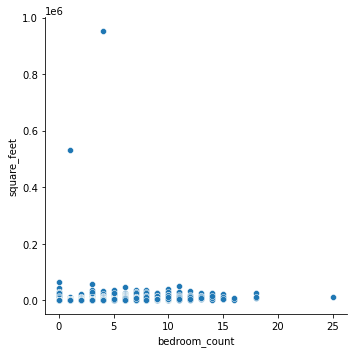

In [3]:
# Let's look at bedroom count v. square feet
sns.relplot(data = properties, x = 'bedroom_count', y = 'square_feet');

In [4]:
# and now scaled
scaler = MinMaxScaler()
properties[['bedroom_count_scaled', 'square_feet_scaled']] = scaler.fit_transform(properties[['bedroom_count', 'square_feet']])

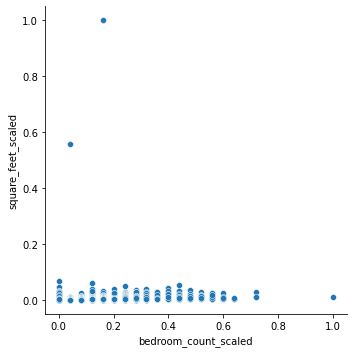

In [5]:
# Now let's see the scaled data
sns.relplot(data = properties, x = 'bedroom_count_scaled', y = 'square_feet_scaled');

# 2

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
inv_trans_scaled_data = scaler.inverse_transform(properties[['bedroom_count_scaled', 'square_feet_scaled']])
(inv_trans_scaled_data == properties[['bedroom_count', 'square_feet']]).mean()

bedroom_count    0.997755
square_feet      0.941297
dtype: float64

The data is mostly the same as the original data.

# 3

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [14]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution = 'normal')
properties[['bedroom_count_transformed', 'square_feet_transformed']] = qt.fit_transform(properties[['bedroom_count', 'square_feet']])

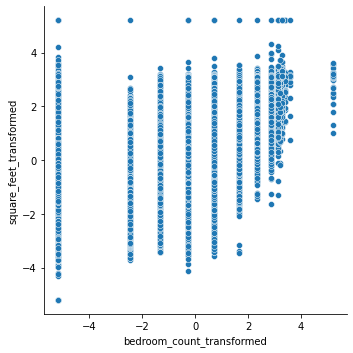

In [15]:
sns.relplot(data = properties, x = 'bedroom_count_transformed', y = 'square_feet_transformed');

# 4

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [16]:
qt = QuantileTransformer()
properties[['bedroom_count_transformed', 'square_feet_transformed']] = qt.fit_transform(properties[['bedroom_count', 'square_feet']])

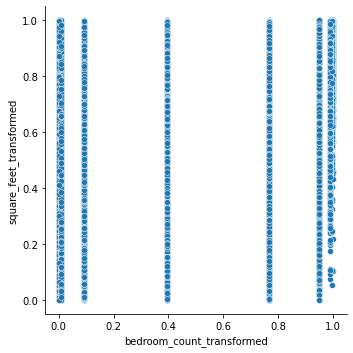

In [17]:
sns.relplot(data = properties, x = 'bedroom_count_transformed', y = 'square_feet_transformed');

The transformed data is no longer normally distributed and is only in the range 0 - 1.

# 5

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [21]:
properties.select_dtypes('number').columns

Index(['bedroom_count', 'bathroom_count', 'square_feet',
       'tax_value_dollar_count', 'year_built', 'tax_amount', 'fed_code',
       'bedroom_count_scaled', 'square_feet_scaled',
       'bedroom_count_transformed', 'square_feet_transformed'],
      dtype='object')

In [22]:
def scale_data(train):
    scaler = MinMaxScaler()
    numeric_columns = train.select_dtypes('number').columns
    train[numeric_columns] = scaler.fit_transform(train[numeric_columns])
    return train

In [24]:
# Let's test it to make sure it works
scaled_data = scale_data(wrangle_zillow())
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom_count,2144167.0,0.132004,0.037369,0.0,0.120000,0.120000,0.160000,1.0
bathroom_count,2144167.0,0.069982,0.030978,0.0,0.062500,0.062500,0.093750,1.0
square_feet,2144167.0,0.001893,0.001283,0.0,0.001257,0.001641,0.002255,1.0
tax_value_dollar_count,2144167.0,0.005107,0.007523,0.0,0.002094,0.003637,0.005926,1.0
year_built,2144167.0,0.743934,0.103039,0.0,0.688372,0.730233,0.813953,1.0
tax_amount,2144167.0,0.005204,0.007244,0.0,0.002352,0.003811,0.005937,1.0
fed_code,2144167.0,0.152927,0.275179,0.0,0.000000,0.000000,0.297297,1.0


In [26]:
# Now let's put in the code to transform validate and test also

def scale_data(train, validate, test):
    scaler = MinMaxScaler()
    numeric_columns = train.select_dtypes('number').columns
    
    train[numeric_columns] = scaler.fit_transform(train[numeric_columns])
    validate[numeric_columns] = scaler.transform(validate[numeric_columns])
    test[numeric_columns] = scaler.transform(test[numeric_columns])
    
    return train, validate, test